# Week 4 Assignment

Analyze m_data and w_data. What is it telling us? I was part of the control group - **I did not receive any hints/information on the dataset.**

In [ ]:
from google.colab import drive

# Load in data
drive.mount('/data/', force_remount = True)
data_dir = '/data/My Drive/EMSE 6574/week4_experiment'
!ls "{data_dir}"

Mounted at /data/
m_data.csv  w_data.csv


## Data Analysis - m_data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
m_data = pd.read_csv(f'{data_dir}/m_data.csv')
m_data.head()

,Unnamed: 0,bmi,steps
0,22393,14.0,217.0
1,16685,171.0,176.0
2,15155,91.0,168.0
3,6162,86.0,101.0
4,22150,146.0,215.0


In [ ]:
# Rename columns and reset index to original
m_data = m_data.rename(columns = {'Unnamed: 0': 'index'})
m_data = m_data.set_index('index')
m_data.head()

,bmi,steps
index,,
22393,14.0,217.0
16685,171.0,176.0
15155,91.0,168.0
6162,86.0,101.0
22150,146.0,215.0


Let's first get some basic stats about the data using `describe()`.

In [ ]:
m_data.describe()

,bmi,steps
count,18548.000000,18548.000000
mean,254.411096,219.864568
std,174.845136,102.026507
min,0.000000,0.000000
25%,97.000000,145.000000
50%,202.000000,222.000000
75%,441.250000,292.000000
max,549.000000,411.000000


It looks like there are BMI values of 0 with a max of 549. The mean of BMI is 254. All of those values are very extreme. There seems to be something off about this data. Let's take a closer look at BMI.

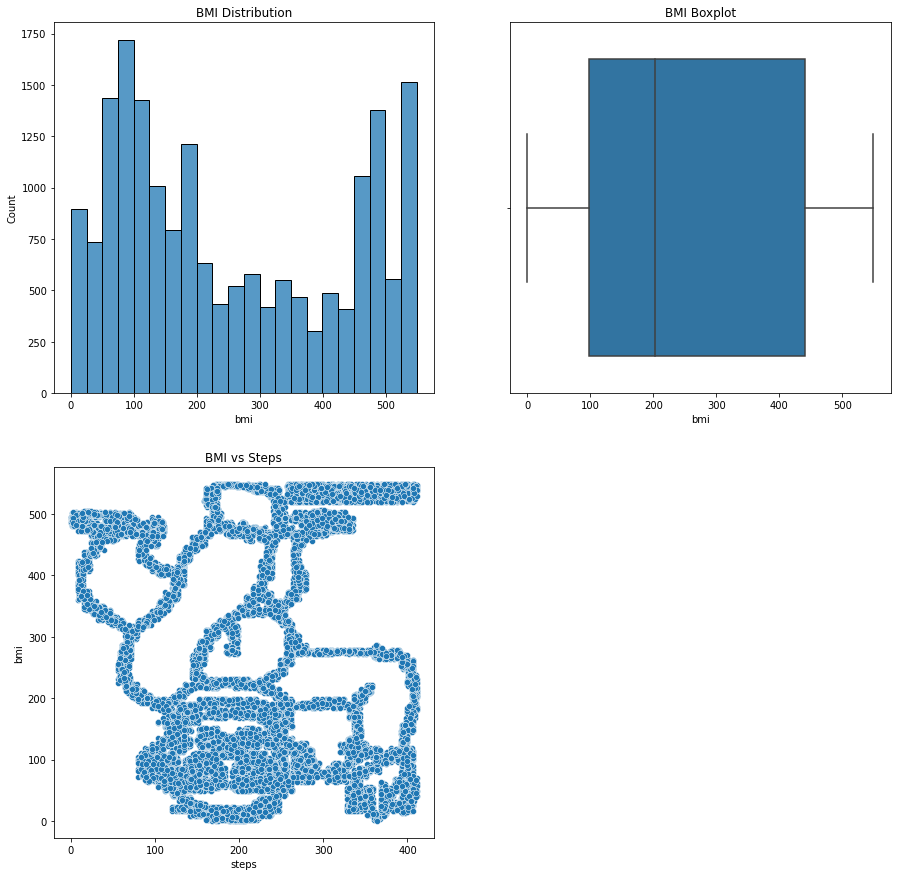

In [ ]:
fig, axs = plt.subplots(2, 2, figsize = (15, 15))
sns.histplot(m_data['bmi'], kde = False, ax = axs[0, 0]);
axs[0, 0].set(title = 'BMI Distribution');

sns.boxplot(x = m_data['bmi'], ax = axs[0, 1]);
axs[0, 1].set(title = 'BMI Boxplot');

sns.scatterplot(x = m_data['steps'], y = m_data['bmi'], ax = axs[1, 0]);
axs[1, 0].set(title = 'BMI vs Steps');

fig.delaxes(axs[1, 1]);

Surprise! Well, looks like we found why the BMI is off. This isn't really a BMI-vs-Steps dataset. The `m_data` file looks to be creating an image when plotting a scatter plot. A monkey perhaps? 

## Data Analysis - w_data

Let's see if we can find something strange with the `w_data` data.

In [ ]:
w_data = pd.read_csv(f'{data_dir}/w_data.csv')
w_data.head()

,Unnamed: 0,bmi,steps
0,19914,179.0,200.0
1,1185,472.0,24.0
2,10394,29.0,135.0
3,138,499.0,7.0
4,8580,97.0,122.0


In [ ]:
# Rename columns and reset index to original
w_data = w_data.rename(columns = {'Unnamed: 0': 'index'})
w_data = w_data.set_index('index')
w_data.head()

,bmi,steps
index,,
19914,179.0,200.0
1185,472.0,24.0
10394,29.0,135.0
138,499.0,7.0
8580,97.0,122.0


Let's get some basic stats again for `w_data`.

In [ ]:
w_data.describe()

,bmi,steps
count,18548.000000,18548.000000
mean,254.232909,220.864406
std,174.901153,102.534039
min,0.000000,0.000000
25%,97.000000,144.000000
50%,200.000000,222.000000
75%,442.000000,296.000000
max,549.000000,411.000000


Just like with `m_data`, it looks like there are BMI values of 0 with a max of 442. The mean of BMI is 549. All of those values are very extreme. Let's visualize BMI again.

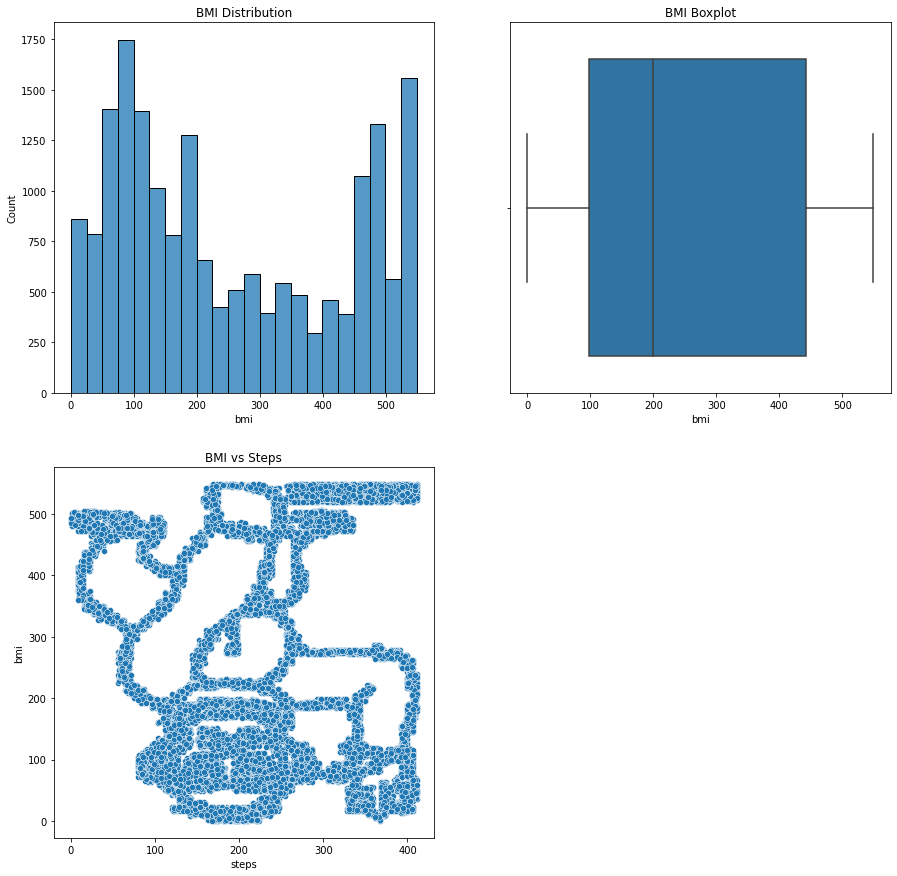

In [ ]:
fig, axs = plt.subplots(2, 2, figsize = (15, 15))
sns.histplot(w_data['bmi'], kde = False, ax = axs[0, 0]);
axs[0, 0].set(title = 'BMI Distribution');

sns.boxplot(x = w_data['bmi'], ax = axs[0, 1]);
axs[0, 1].set(title = 'BMI Boxplot');

sns.scatterplot(x = w_data['steps'], y = w_data['bmi'], ax = axs[1, 0]);
axs[1, 0].set(title = 'BMI vs Steps');

fig.delaxes(axs[1, 1]);

Surprise again! The `w_data` is also a dataset meant to draw another picture.